In [1]:
import requests
import bs4 as bs
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
wiki_html = requests.get(url).text
soup = BeautifulSoup(wiki_html, 'html.parser')

data = []
for tr in soup.tbody.find_all('tr'):
    data.append([ td.get_text().strip() for td in tr.find_all('td')])

In [3]:
df = pd.DataFrame(data,columns=['PostalCode','Borough','Neighborhood2'])

In [4]:
# "Not assigned" in Borough column
indexNames = df[(df['Borough'] == "Not assigned")].index

# Drop rows that have "Not assigned" Borough
df.drop(indexNames,inplace=True)

# Drop the first row
df.dropna(inplace=True)

In [5]:
# Combine multiple rows using PostalCode and Borough
df=df.groupby(['PostalCode','Borough'])['Neighborhood2'].apply(', '.join).reset_index()

In [6]:
# Replace "Not assigned" Neighbourhoods with Borough
def custom_fx(data):
    if data['Neighborhood2']=='Not assigned':
        var=data['Borough']
    else:
        var=data['Neighborhood2']
    return var

df['Neighborhood']=df.apply(custom_fx,axis='columns')

print("There are {} rows that have 'Not assigned' in Neighborhood column in the dataframe".format(
    len(df[df['Neighborhood']=='Not assigned'])
)
     )

# Delete Neighborhood2 column
df.drop(columns='Neighborhood2')

There are 0 rows that have 'Not assigned' in Neighborhood column in the dataframe


,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


In [7]:
lonlat=pd.read_csv('http://cocl.us/Geospatial_data')
todf=df

In [8]:
print("Column names of lonlat dataframe are: {}, {}, and {}.".format(lonlat.columns[0],lonlat.columns[1],lonlat.columns[2]))

Column names of lonlat dataframe are: Postal Code, Latitude, and Longitude.


In [9]:
print("Column names of todf dataframe are: {}, {}, and {}.".format(todf.columns[0],todf.columns[1],todf.columns[2]))

Column names of todf dataframe are: PostalCode, Borough, and Neighborhood2.


In [10]:
lonlat.rename(columns={'Postal Code':'PostalCode'},inplace=True)

In [11]:
todf_geo=pd.merge(todf,lonlat,how='left',on='PostalCode')

In [12]:
todf_geo

,PostalCode,Borough,Neighborhood2,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park,Kennedy Park / Ionview / East Birchmount Park,43.727929,-79.262029
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West,Cliffside / Cliffcrest / Scarborough Village West,43.716316,-79.239476
9,M1N,Scarborough,Birch Cliff / Cliffside West,Birch Cliff / Cliffside West,43.692657,-79.264848


In [13]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import geopy # install it in Anaconda Prompt
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium

from IPython.display import Image # will upload screenshots later

     |████████████████████████████████| 92kB 15.2MB/s eta 0:00:01


In [14]:
import folium

In [15]:
tonbhd = todf_geo
to_data = tonbhd[tonbhd.Borough.str.contains('Toronto')]
to_data.head()

,PostalCode,Borough,Neighborhood2,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,The Danforth West / Riverdale,The Danforth West / Riverdale,43.679557,-79.352188
42,M4L,East Toronto,India Bazaar / The Beaches West,India Bazaar / The Beaches West,43.668999,-79.315572
43,M4M,East Toronto,Studio District,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,Lawrence Park,43.728020,-79.388790


In [16]:
to_data.shape

(39, 6)

In [17]:
address = 'Toronto'
geolocator = Nominatim(user_agent="trt_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Toronto coordinates are {}, {}.'.format(latitude, longitude))

Toronto coordinates are 43.6534817, -79.3839347.


In [18]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)
for lat, lng, label in zip(to_data['Latitude'], to_data['Longitude'], to_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [19]:
import urllib.request

In [20]:
url='https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods'
skip_table = 1

source = urllib.request.urlopen(url).read()
soup = bs.BeautifulSoup(source,'html.parser')

table = soup.find_all('table')[skip_table]
table_rows = table.find_all('tr')

l = []
for tr in table_rows:
    #print (tr)
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        l.append(row)

In [21]:
bdf = pd.DataFrame(l, columns=["Neighbourhood", "FM", "Census", "Population", "Land Area", "Density", "Population %", "Income", "Commuting", "Renters", "2nd Language", "2nd Language %"])

bdf = bdf[bdf.Neighbourhood != 'Toronto CMA Average']
bdf = bdf.drop('FM', 1)
bdf = bdf.drop('Census', 1)
bdf = bdf.drop('Renters', 1)
bdf = bdf.drop('2nd Language', 1)
bdf = bdf.drop('2nd Language %', 1)

# change to the proper datatype
bdf['Population'] = bdf['Population'].str.replace(',','')
bdf['Population'] = bdf['Population'].apply(pd.to_numeric)
#print (df1.dtypes)

# display sample data
bdf.head(10)

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting
1,Agincourt,44577,12.45,3580,4.6,"25,750",11.1
2,Alderwood,11656,4.94,2360,-4.0,"35,239",8.8
3,Alexandra Park,4355,0.32,"13,609",0.0,"19,687",13.8
4,Allenby,2513,0.58,4333,-1.0,"245,592",5.2
5,Amesbury,17318,3.51,"4,934",1.1,"27,546",16.4
6,Armour Heights,4384,2.29,1914,2.0,"116,651",10.8
7,Banbury,6641,2.72,2442,5.0,"92,319",6.1
8,Bathurst Manor,14945,4.69,3187,12.3,"34,169",13.4
9,Bay Street Corridor,4787,0.11,"43,518",3.0,"40,598",17.1
10,Bayview Village,12280,4.14,"2,966",41.6,"46,752",14.4


In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
total_population = bdf['Population'].sum()

bdf['Population Score'] = bdf['Population']/total_population*100

bdf = bdf.sort_values('Population Score', ascending=False)
bdf.head(10)

,Neighbourhood,Population,Land Area,Density,Population %,Income,Commuting,Population Score
113,Old East York,52220,7.94,6577,-4.6,"33,172",22.0,2.161626
170,Woburn,48507,13.34,3636,-1.5,"26,190",13.3,2.007928
50,Elia (Jane and Finch),48003,7.66,6267,-10.0,"22,691",13.0,1.987065
86,L'Amoreaux,45862,7.15,6414,0.9,"26,375",13.4,1.898439
1,Agincourt,44577,12.45,3580,4.6,"25,750",11.1,1.845247
98,Malvern,44324,8.86,5003,1.5,"25,677",13.6,1.834774
168,Willowdale,43144,7.68,5618,62.3,"39,895",15.6,1.785929
44,Downsview,36613,16.13,2270,-5.0,"26,751",14.4,1.515581
108,Newtonbrook,36046,8.77,4110,0.3,"33,428",16.6,1.492110
139,Smithfield,34996,6.45,5426,-7.2,"24,387",12.8,1.448645


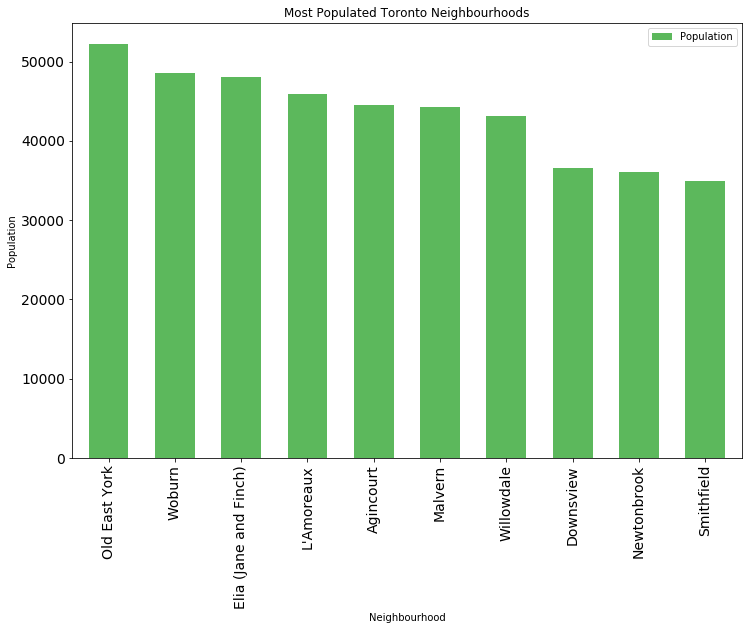

In [24]:
population_chart = bdf[['Neighbourhood', 'Population']].copy()
top_chart = population_chart.head(10)
top_chart.set_index('Neighbourhood', inplace=True)

colors = ['#5cb85c', '#5bc0de', '#d9534f']
top_chart.plot(kind='bar', figsize=(12, 8), width=0.6, fontsize=14, color=colors)

plt.xlabel('Neighbourhood') 
plt.ylabel('Population') 
plt.title('Most Populated Toronto Neighbourhoods') 

plt.show()

In [60]:
CLIENT_ID = 'K1NGVKE0WADD5CJOJXMW1MNER4WPB51TIOUQCW5LMMBJXMXT' # your Foursquare ID
CLIENT_SECRET = 'HVDZBALRMSVYGKWODPJTQ2AER44T2LHMQMHJUPHRV0JD5AQ5' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

print('CREDENTIALS:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

CREDENTIALS:
CLIENT_ID: K1NGVKE0WADD5CJOJXMW1MNER4WPB51TIOUQCW5LMMBJXMXT
CLIENT_SECRET:HVDZBALRMSVYGKWODPJTQ2AER44T2LHMQMHJUPHRV0JD5AQ5


In [61]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6534817 -79.3839347


In [62]:
search_query = 'coffee'
radius = 500
print(search_query + " in Toronto")

coffee in Toronto


In [63]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=K1NGVKE0WADD5CJOJXMW1MNER4WPB51TIOUQCW5LMMBJXMXT&client_secret=HVDZBALRMSVYGKWODPJTQ2AER44T2LHMQMHJUPHRV0JD5AQ5&ll=43.6534817,-79.3839347&v=20180604&query=coffee&radius=500&limit=30'

In [64]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9e6badd039930028d403c7'},
 'response': {'venues': [{'id': '4b44fc77f964a520cc0026e3',
    'name': "Timothy's World Coffee",
    'location': {'address': '427 University Avenue',
     'lat': 43.65405317976302,
     'lng': -79.38808999785911,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65405317976302,
       'lng': -79.38808999785911}],
     'distance': 340,
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['427 University Avenue', 'Toronto ON', 'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1587440648',
    'hasPerk': False},
   {'id': '59f784dd28122f14f9d5d63d',
    'name': 'HotBlack Coffee',
    'lo

In [65]:
venues = results['response']['venues']

dataframe = json_normalize(venues)
dataframe.head(10)

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b44fc77f964a520cc0026e3,427 University Avenue,CA,Toronto,Canada,NaN,340,"[427 University Avenue, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65405317976302...",43.654053,-79.388090,NaN,NaN,ON,Timothy's World Coffee,v-1587440648,NaN
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,59f784dd28122f14f9d5d63d,245 Queen Street West,CA,Toronto,Canada,at St Patrick St,515,"[245 Queen Street West (at St Patrick St), Tor...","[{'label': 'display', 'lat': 43.65036434800487...",43.650364,-79.388669,Entertainment District,M5V 1Z4,ON,HotBlack Coffee,v-1587440648,463001529
2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4b0aaa8ef964a520272623e3,"483 Bay St,Bell Trinity Square",CA,Toronto,Canada,Bell Trinity Square,130,"[483 Bay St,Bell Trinity Square (Bell Trinity ...","[{'label': 'display', 'lat': 43.653436, 'lng':...",43.653436,-79.382314,NaN,M5G 2C9,ON,Timothy's World Coffee,v-1587440648,NaN
3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4baa9f6cf964a520817a3ae3,401 Bay St.,CA,Toronto,Canada,at Richmond St. W,268,"[401 Bay St. (at Richmond St. W), Toronto ON M...","[{'label': 'display', 'lat': 43.65213455850074...",43.652135,-79.381172,NaN,M5H 2Y4,ON,Timothy's World Coffee,v-1587440648,NaN
4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,53e8acc4498ee294fb100183,425 University Ave,CA,Toronto,Canada,Dundas,296,"[425 University Ave (Dundas), Toronto ON M5G 1...","[{'label': 'display', 'lat': 43.65427, 'lng': ...",43.654270,-79.387448,NaN,M5G 1T6,ON,Timothy's World Coffee,v-1587440648,NaN
5,[],False,4baa31def964a52037523ae3,350 Bay St - 7th Floor,CA,Toronto,Canada,NaN,488,"[350 Bay St - 7th Floor, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.649498, 'lng':...",43.649498,-79.386479,NaN,NaN,ON,Coffee office,v-1587440648,NaN
6,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4c19447c4ff90f4765ac0f49,"595 Bay St,Atrium On Bay",CA,Toronto,Canada,at Atrium on Bay,309,"[595 Bay St,Atrium On Bay (at Atrium on Bay), ...","[{'label': 'display', 'lat': 43.656219, 'lng':...",43.656219,-79.383290,NaN,M5G 2C2,ON,Timothy's World Coffee,v-1587440648,NaN
7,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4ec514ec9911232436e364af,Yonge,CA,Toronto,Canada,Dundas,481,"[Yonge (Dundas), Toronto ON M5B 2G9, Canada]","[{'label': 'display', 'lat': 43.65669995833159...",43.656700,-79.379941,NaN,M5B 2G9,ON,Timothy's World Coffee,v-1587440648,NaN
8,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,57b1d07b498e85a00ac8baa8,NaN,CA,NaN,Canada,NaN,222,[Canada],"[{'label': 'display', 'lat': 43.652355, 'lng':...",43.652355,-79.381650,NaN,NaN,NaN,Coffee Court,v-1587440648,NaN
9,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,509d036ee4b0912bf20c8abc,Bell Trinity Square,CA,Toronto,Canada,NaN,137,"[Bell Trinity Square, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.65311707897502...",43.653117,-79.382310,NaN,NaN,ON,Treats Coffee Emporium,v-1587440648,NaN
